# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [56]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0]=self.pos
        for i in range (n):
            self.pos = numpy.add(self.pos,self.pickStep())
            positions[i+1]=self.pos
        return positions

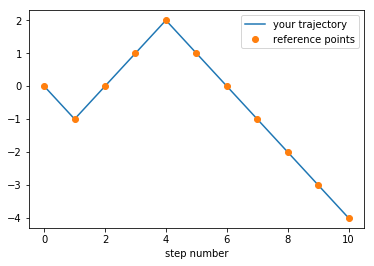

In [57]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

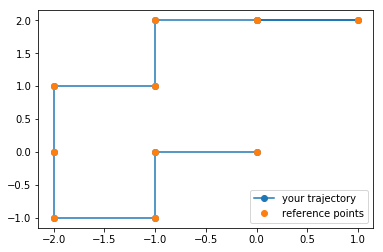

In [58]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

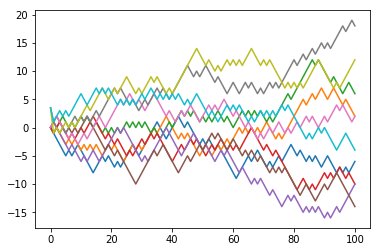

In [22]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


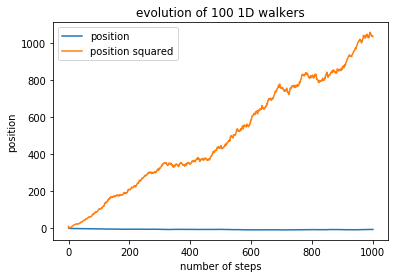

In [27]:
nsteps = 1000
ndim = 1
nwalkers = 100
ol=[]
for i in range(nwalkers):
    w = walker(numpy.zeros(ndim))
    ys = w.doSteps(nsteps)
    ol.append(ys)
y=numpy.average(ol,axis=0)
sq_p=[x**2 for x in ol]
sq=numpy.average(sq_p,axis=0)
plt.plot(range(nsteps+1),y,label='position')
plt.plot(range(nsteps+1),sq,label='position squared')
plt.xlabel('number of steps')
plt.ylabel('position')
plt.title('evolution of 100 1D walkers')
plt.legend()
plt.show()

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


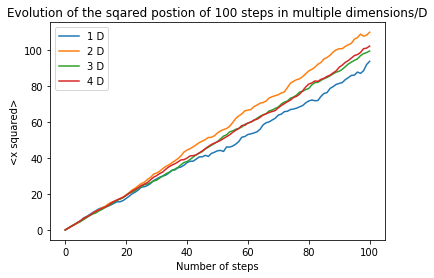

In [122]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)
for ndim in dimensions:
    pot = []
    for i in range(400):
        w = walker(numpy.zeros(ndim), ndim=ndim)
        yse = w.doSteps(100)
        pot.append(yse)
    grr = []
    for i in range(len(pot)):
        to=[]
        for j in range(len(pot[i])):
            t = (numpy.linalg.norm(pot[i][j]))**2
            to.append(t)
        grr.append(to)
    prr = numpy.average(grr,axis=0)
    plt.plot(range(0,101),prr,label = '%s D' %(ndim))

plt.xlabel('Number of steps')
plt.ylabel('<x squared>')
plt.title('Evolution of the sqared postion of 100 steps in multiple dimensions/D')
plt.legend()
plt.show()

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


In [162]:
ndim=2
nwalkers=500

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

for i in range(nwalkers):
    w = walker(ndim = 2, x0 = rand_pos[i],step_size=0.05)
    pro = w.doSteps(500)
    val10 = pro[10][i]
    val100 = pro[100][i]
    val500 = pro[500][i]
    print(val500)

plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]): 
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("position after {} steps ".format(nsteps))    
    plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.2)

0.78237134
-0.97993076


IndexError: index 2 is out of bounds for axis 0 with size 2